In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import cv2
import numpy as np

In [30]:
image = cv2.imread("/content/123.jpg")
rect = (50, 50, 450, 290)

In [31]:
# Initialize the mask
mask = np.zeros(image.shape[:2], np.uint8)

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

In [32]:
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[ 2.05942576e-01,  1.95454339e-01,  2.75898288e-01,
          2.01665377e-01,  1.21039420e-01,  6.03320077e+01,
          1.44079614e+02,  1.85271211e+02,  2.53143600e+01,
          9.74367555e+01,  1.44787646e+02,  1.81646212e+01,
          2.90623961e+01,  4.51294375e+01,  1.10090817e+01,
          6.52858190e+01,  9.46894743e+01,  1.32563078e+02,
          1.48138529e+02,  1.67506626e+02,  2.31065865e+02,
          2.28039649e+02,  3.17222207e+02,  2.28039649e+02,
          4.45452897e+02,  5.34193867e+02,  3.17222207e+02,
          5.34193867e+02,  9.37330223e+02,  1.70617664e+02,
          6.21318204e+01,  1.01126624e+02,  6.21318204e+01,
          2.76080206e+02,  1.67879675e+02,  1.01126624e+02,
          1.67879675e+02,  3.53363395e+02,  2.32788502

In [33]:
mask2 = np.where((mask == 0) | (mask == 2), 0, 1).astype('uint8')

In [34]:
segmented_image = image * mask2[:, :, np.newaxis]

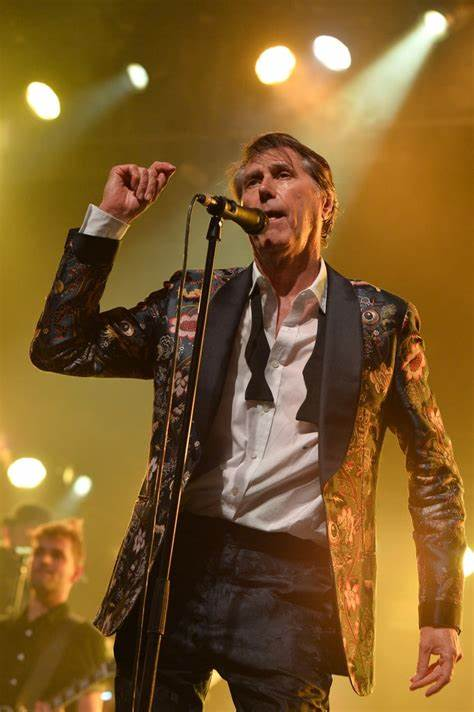

In [35]:
from google.colab.patches import cv2_imshow

cv2_imshow(image)

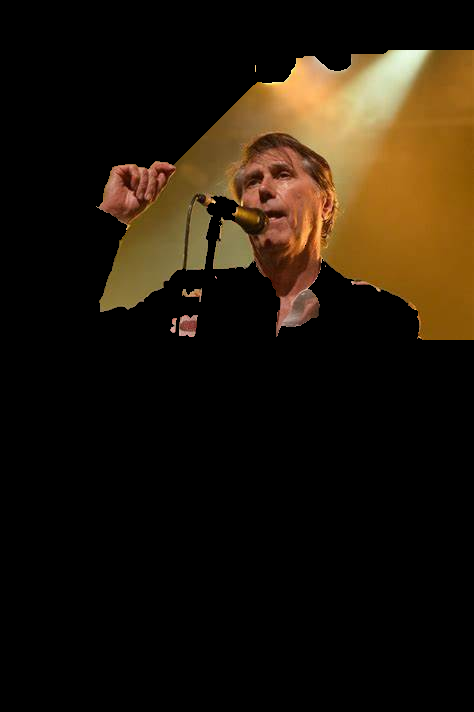

In [36]:
cv2_imshow( segmented_image)
cv2.waitKey(0)
cv2.destroyAllWindows()